In [2]:
import numpy as np
import os 
import nibabel as nib
from glob import *
import pandas as pd

# timeseries =nib.load(f'I:\LABComputer\Work\Matlab\Work\Age\ICA\Age_conn_sub045_timecourses_ica_s1_.nii')
# ica = timeseries.get_fdata()


In [14]:
roi_label =[]
node_path = r'F:\Matlab\Work\VBM\ica_label.txt'
with open(node_path,"r") as file:
    for num,line in enumerate(file.readlines()):
        # print(num,line)
        if num ==0:
            continue
        a = line.strip('\n')
        roi_label.append(a)
    file.close()
# roi_lab_inx = np.array([1]*4+[2]*3+[3]*4+[4]*7+[5]*4+[6]*4+[7]*4+[8]*2)
# roi_networks = ['DMN','DMN','DMN','DMN','SMN','SMN','SMN','VIS','VIS','VIS','VIS',"SAN","SAN","SAN","SAN","SAN","SAN","SAN","DAN","DAN","DAN"
#           ,"DAN","FPN","FPN","FPN","FPN","LN","LN","LN","LN","CE","CE"]
# roi_lab_df = pd.DataFrame({0:roi_lab_inx,1:roi_networks})
print(roi_label)

['DMN.Anterior_cingulum_cortex_(18)', 'DMN.Precuneus_(19)', 'DMN.Anterior_cingulum_cortex_(31)', 'DMN.Anterior_cingulum_cortex_(52)', 'DMN.Angular_gyrus_(53)', 'DMN.Post_cingulum&Precuneus_(55)', 'DMN.Post_cingulum_(64)', 'DMN.Post_cingulum_(74)', 'DMN.Post_cingulum&Precuneus_(86)', 'DMN.Post_cingulum&Precuneus_(87)', 'DMN.Post_cingulum_(94)', 'SMN.Right_precentral_gyrus_(1)', 'SMN.Postcentral_gyrus_(15)', 'SMN.Superior_parietal_lobule_(20)', 'SMN.Left_precentral_gyrus_(21)', 'SMN.Paracentral_lobule_(25)', 'SMN.Postcentral_gyrus_(48)', 'VIS.Middle_occipital_gyrus_(23)', 'VIS.Lingual_gyrus_(17)\t', 'VIS.Cuneus_(30)', 'VIS.Cuneus_(34)', 'VIS.Middle_temporal_gyrus_(34)', 'VIS.Lingual_gyrus_(37)', 'VIS.Lingual_gyrus_(47)', 'VIS.Left_Lingual_gyrus_(57)', 'VIS.Middle_temporal_gyrus_(58)', 'VIS.Calcarine_(67)', 'VIS.Cuneus_(79)', 'VIS.Cuneus&precuneus_(89)', 'CC.Supplementary_motor_area_(23)', 'CC.Left_inferior_frontal_gyrus_(28)', 'CC.Middle_cingulum_(33)', 'CC.Supplementary_motor_area_(35)'

In [3]:
# DMN = [18, 19,31,52,53,55,64,74,86,87,94] # 11
# SMN = [10,15,20,21,45,48] # 6 
# VIS = [12,17,30,34,36,37,47,57,58,67,79,89] # 12
# SC = [25,40,49,66,76,90,99] # 7
# CC = [23,28,33,35,39,42,43,46,60,63,65,68,70,73,78,83,85,88] # 18
# AUD = [69,75,77,91,96,97] # 6

DMN = [i for i in range(0, 11)]# 16
SMN = [i for i in range(11, 17)] # 8 
VIS = [i for i in range(17, 29)] # 7
CC = [i for i in range(29, 47)] # 16
SC = [i for i in range(47, 54)] # 9
AUD = [i for i in range(54, 60)] # 4

all_con = np.array(DMN+SMN+VIS+SC+CC+AUD)

LDI = np.array( [0.33333333,  0.19444444,  0.44444444,  0.55555556, 0.16666667,  0.00000000,-0.19444444,
 0.08333333 , 0.4722222,  0.13888889 , 0.16666667,  0.33333333,  0.00000000,  0.41666667,
  0.16666667,  0.19444444,  0.27777778,  0.36111111,  0.00000000,  0.36111111,  0.44444444,
  0.30555556,  0.38888889,  0.25000000,  0.08333333,  0.22222222,  0.27777778,  0.69444444,
  0.47222222,  0.16666667,  0.00000000,  0.52777778,  0.13888889,  0.50000000,0.02777778,  0.16666667,  
    0.00000000 , 0.08333333 , 0.00000000  ,0.11111111 , 0.25000000 , 
        0.05555556, 0.16666667,  0.11111111 , 0.50000000 , 0.08333333 , 0.41666667,-0.02777778,
  0.05555556,  0.44444444 , 0.00000000 , 0.22222222, -0.05555556, -0.08333333 , 0.13888889,
  0.19444444,  0.00000000, -0.30555556,  0.02777778,  0.11111111, -0.36111111 , 0.44444444])

In [96]:
global_ldi_dict = {}
global_ldi_dict['Subject'] = [i for i in range(1,63)]
global_ldi_dict['Group'] = ['Younger']*34 + ['Elder']*28
# global_int_dict['Grobal_int'] = global_int
global_ldi_dict['LDI'] = LDI
global_ldi_df = pd.DataFrame(global_ldi_dict)
global_ldi_df.to_csv('global_ldi_df.csv',index =False)

In [5]:
sgmv = np.loadtxt('F:\Matlab\Work\VBM\ICA\smooth_ROISignals.txt')

In [91]:
print(sgmv.shape)

net_sgmv = [network_agv(i) for i in sgmv ]
net_sgmv = np.array(net_sgmv)
print(net_sgmv.shape)
net_sgmv_value = net_sgmv.flatten()
print(len(net_sgmv_value))

net_gmv_dict = {}
net_gmv_dict['Group'] =['Younger']*34*6+ ['Elder']*28*6
net_gmv_dict['Network'] = networks*62
net_gmv_dict['GMV'] = net_sgmv_value

net_gmv_df =  pd.DataFrame(net_gmv_dict)
print(net_gmv_df)
net_gmv_df.to_csv('GMV/net_gmv.csv', index = False)

(62, 60)
(62, 6)
372
       Group Network       GMV
0    Younger     DMN  0.407328
1    Younger     SMN  0.363920
2    Younger     VIS  0.515012
3    Younger      CC  0.328136
4    Younger      SC  0.332727
..       ...     ...       ...
367    Elder     SMN  0.284474
368    Elder     VIS  0.414277
369    Elder      CC  0.274584
370    Elder      SC  0.279428
371    Elder     AUD  0.366601

[372 rows x 3 columns]


In [9]:
net_label = ['DMN']*11+['SMN']*6 + ['VIS']*12+ ['CC']*18+ ['SC']*7+ ['AUD']*6
group_label = ['Younger']*34*60+ ['Elder']*28*60

In [16]:
gmv_dict = {}
gmv_dict['Group'] = group_label
gmv_dict['ICA'] = ica_label*62
gmv_dict['GMV'] = gmv

gmv_df = pd.DataFrame(gmv_dict)
print(gmv_df)
gmv_df.to_csv('GMV/ica_gmv2.csv', index = False)

        Group    ICA       GMV
0     Younger  DMN_1  0.633542
1     Younger  DMN_2  0.000002
2     Younger  DMN_3  0.156534
3     Younger  DMN_4  0.358130
4     Younger  DMN_5  0.469591
...       ...    ...       ...
3715    Elder  AUD_2  0.304525
3716    Elder  AUD_3  0.420302
3717    Elder  AUD_4  0.404408
3718    Elder  AUD_5  0.417130
3719    Elder  AUD_6  0.343224

[3720 rows x 3 columns]


In [ ]:
import scipy.stats as stats
# from bioinfokit.analys import stat,get_data
from statsmodels.stats.multitest import multipletests

tvalue, pvalue = stats.ttest_ind(tiv_pd['GM'][:120],tiv_pd['GM'][120:])
print(tvalue, pvalue )

In [22]:
###### one-way anova

import pingouin as pg 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

print(gmv_df)
pg.welch_anova(dv='GMV', between='Network', data = gmv_df)

# Source	ddof1	ddof2	F	p-unc	np2
# 0	Network	5	1501.754699	314.891809	8.297466e-231	0.169344


###### two-way anova
nmn = 'GMV'
formura = f"{nmn}~C(Group)+C(Network)+C(Group):C(Network)"
anova_result = anova_lm(ols(formura,gmv_df).fit())
# f1 = anova_result['F'][0]
# f2 = anova_result['F'][1]
# f3 = anova_result['F'][2]
# p1 = anova_result['PR(>F)'][0] 
# p2 = anova_result['PR(>F)'][1]
# p3 = anova_result['PR(>F)'][2]
print(anova_result)

#                          df     sum_sq   mean_sq           F         PR(>F)
# C(Group)                1.0   4.288290  4.288290  223.770663   3.600677e-49
# C(Network)              5.0  15.415927  3.083185  160.886136  3.673716e-155
# C(Group):C(Network)     5.0   0.269798  0.053960    2.815708   1.524787e-02
# Residual             3708.0  71.059272  0.019164         NaN            NaN

        Group Network       GMV
0     Younger     DMN  0.633542
1     Younger     DMN  0.000002
2     Younger     DMN  0.156534
3     Younger     DMN  0.358130
4     Younger     DMN  0.469591
...       ...     ...       ...
3715    Elder     AUD  0.304525
3716    Elder     AUD  0.420302
3717    Elder     AUD  0.404408
3718    Elder     AUD  0.417130
3719    Elder     AUD  0.343224

[3720 rows x 3 columns]
                         df     sum_sq   mean_sq           F         PR(>F)
C(Group)                1.0   4.288290  4.288290  223.770663   3.600677e-49
C(Network)              5.0  15.415927  3.083185  160.886136  3.673716e-155
C(Group):C(Network)     5.0   0.269798  0.053960    2.815708   1.524787e-02
Residual             3708.0  71.059272  0.019164         NaN            NaN


In [192]:
import numpy as np
import pandas as pd
# from scipy.io import loadmat
from scipy import stats
# from mne.viz import circular_layout, plot_connectivity_circle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_style("whitegrid")
# sinplot()
# sns.despine(top=True, right=True, left=False, bottom=False)

def plot_sns_linear(x, y,r_value,p_value,col,maker,save_path = None):
    
    fig = plt.figure()
    ax = sns.regplot(x= x , y = y,
                        # data= stroke_reconfiguration_all,#x此时为离散变量
                 color = col,
                 marker = maker,
                     
                ci = 95,  line_kws = dict(color="r")
                 )
    ax.tick_params(labelsize = 16 )
    font1 = {'family':'arial','size':20}
    # plt.ylabel("Fraction", fontdict = font1)
    # plt.xlabel("State", fontdict = font1)
    
    
    # ax.text(3.5, 0.3, f'y = {round(slope,2)}*x+{round(intercept,2)}', ha="center", va="center", color="#5959AB", 
    #     fontsize= 12, fontweight='bold')
    # min_y = np.max(y)
    # ax.text(0.30, 2.0, f'r = {round(r_value,4)}, p = {round(p_value,4)}', ha = "center", va = "center", 
    #         color = col, 
    #     fontsize = 12, fontweight = 'bold')
    ax.set_xlabel("Grey Matter Volumn",fontdict={ 'fontproperties':"Arial",'fontsize': 16, 'weight':'bold'})
    ax.set_ylabel("Intrinsic Timescale",fontdict={ 'fontproperties':"Arial",'fontsize': 16, 'weight':'bold'})
    plt.xticks(fontname = "Arial") 
    plt.yticks(fontname = "Arial")
    if save_path:
        fig.savefig(save_path,bbox_inches='tight', pad_inches= 0, dpi=500)
        


In [ ]:
intt_df = pd.read_csv('timescale/timescale_ica_df.csv')
def changename(x):
    # print(x)
    # print(x.startswith('DMN
    if x.startswith('DMN'):
        x = 'DMN'
    elif x.startswith('SMN'):
        x = 'SMN'
    elif x.startswith('VIS'):
        x = 'VIS' 
    elif x.startswith('CC'):
        x = 'CC' 
    elif x.startswith('SC'):
        x = 'SC'
    elif x.startswith('AUD'):
        x = 'AUD'        
    return x
intt_df['ICA']=  intt_df['ICA'].map(lambda x:changename(x))


==> ('DMN', 0.4505085543877242, 0.00023855504819758698)
==> ('SMN', 0.47717331150236364, 8.807088601231362e-05)
==> ('VIS', 0.30374202634365804, 0.016395250631646936)
==> ('CC', 0.45722332324280396, 0.00018704070045777072)
==> ('SC', 0.35755859893205316, 0.0043295111246020096)
==> ('AUD', 0.44858254457393754, 0.00025555992163600486)


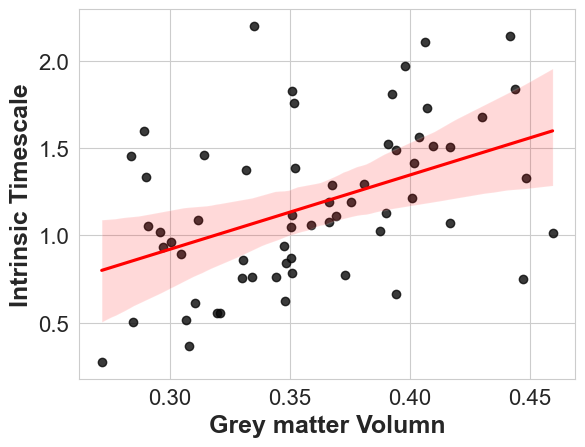

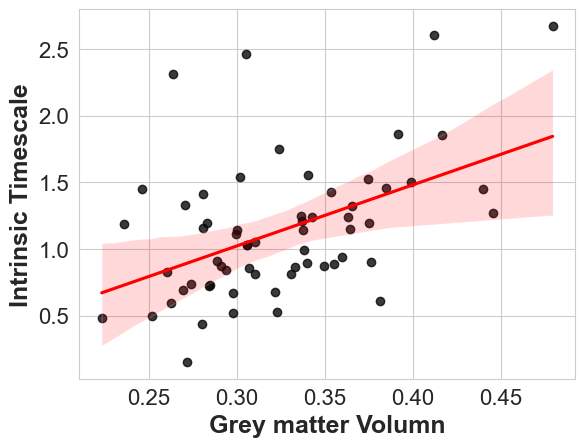

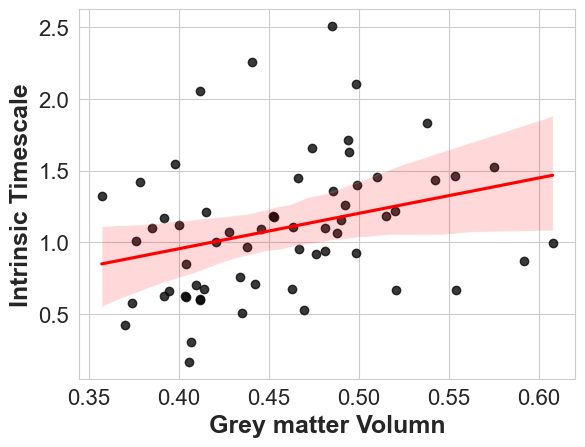

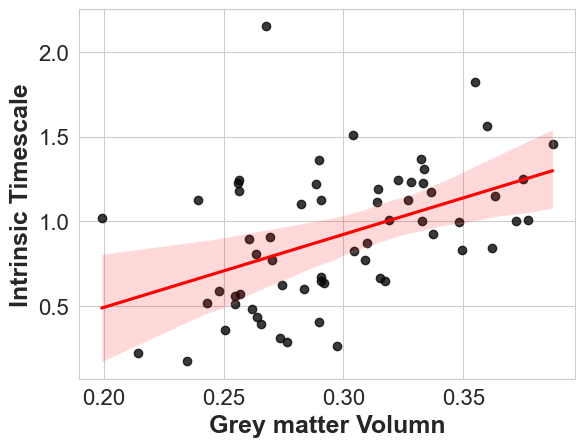

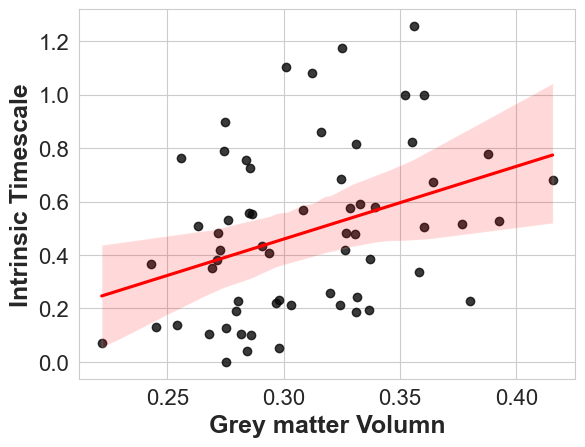

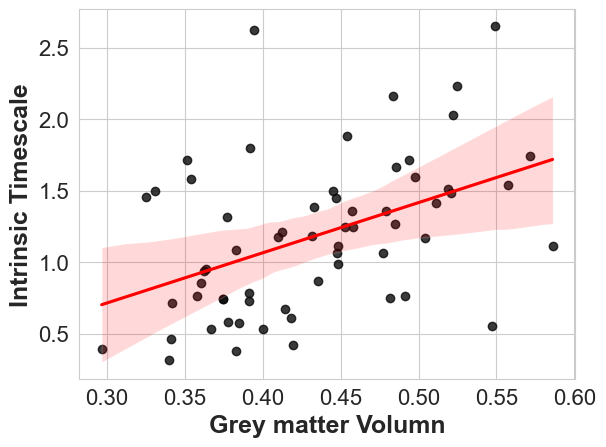

In [112]:
net_intt_df = pd.read_csv('timescale/timescale_net_df2.csv')
net_gmv_df = pd.read_csv('GMV/net_gmv.csv')

networks = ['DMN','SMN','VIS','CC','SC','AUD']
for network in networks:
    net_intt = net_intt_df[net_intt_df['ICA'] == network]
    net_gmv = net_gmv_df[net_gmv_df['Network'] == network]
    intt = net_intt['Timescale'].values
    gmv = net_gmv['GMV'].values
    t, p =  stats.pearsonr(gmv, intt)
    print(f"==> {network,t,p}")
    if p < 0.05:
        save_path = 'gmv_int'+network+'jpg'
        col = '.03'
        maker = 'o'
        plot_sns_linear(gmv, intt,col,maker,save_path) 

In [86]:
from scipy.stats import t as tcdf
def one_tailed_linerr(x,y):
    n = len(x)
    df = n - 2
    r = np.corrcoef(x, y)[0, 1]

    t_value = r / np.sqrt((1 - r**2) / (n - 2))
    # t_value
    p_value_lower = tcdf.cdf(-np.abs(t_value), df)
    p_value_upper = 1 - tcdf.cdf(t_value, df)
    return r, p_value_upper

In [171]:
ica_intt_df
ica_gmv_df

,Group,ICA,GMV
0,Younger,DMN_1,0.633542
1,Younger,DMN_2,0.000002
2,Younger,DMN_3,0.156534
3,Younger,DMN_4,0.358130
4,Younger,DMN_5,0.469591
...,...,...,...
3715,Elder,AUD_2,0.304525
3716,Elder,AUD_3,0.420302
3717,Elder,AUD_4,0.404408
3718,Elder,AUD_5,0.417130


0.2932964867309242 0.020692198056642845
==> (0.2932964867309242, 0.020692198056642845)


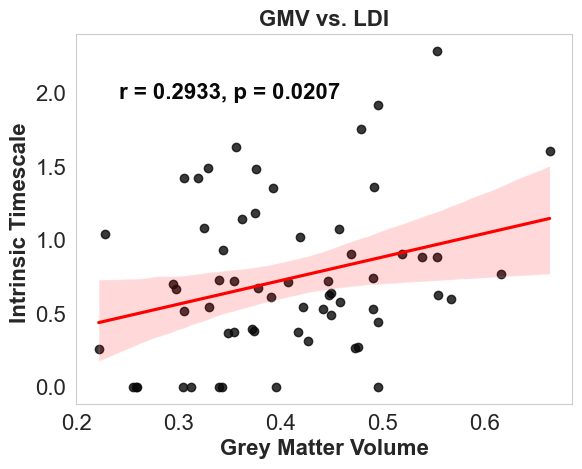

In [193]:
ica_intt_df = pd.read_csv('./timescale/timescale_ica_df.csv')
# ica_intt_df = pd.read_csv('./timescale/all_int_df2.csv')
ica_gmv_df = pd.read_csv('GMV/ica_gmv2.csv')
# print(ica_intt_df)
# print(ica_gmv_df)
vis_6_int = ica_intt_df[ica_intt_df['ICA'] == 'VIS_11']['Timescale'].values
vis_6_gmv = ica_gmv_df[ica_gmv_df['ICA'] == 'VIS_11']['GMV'].values

# print(vis_6_int)
# print(vis_6_gmv)


def plot_sns_linear2(x, y,r_value ,p_value, col,maker, name, save_path = None):
    
    fig = plt.figure()
    ax = sns.regplot(x= x , y = y,
                        # data= stroke_reconfiguration_all,#x此时为离散变量
                 color= col,
                 marker= maker,line_kws = dict(color="r")
                 )
    # ax.text(3.5, 0.3, f'y = {round(slope,2)}*x+{round(intercept,2)}', ha="center", va="center", color="#5959AB", 
    #     fontsize= 12, fontweight='bold')
    min_y = np.min(y)
    ax.text(0.35, 2, f'r = {round(r_value,4)}, p = {round(p_value,4)}', ha ="center", va = "center", 
            color = col, fontsize = 16, fontweight= 'bold')
    ax.set_xlabel("Grey Matter Volume",fontdict = { 'fontproperties':"Arial",'fontsize':16, 'weight':'bold'})
    ax.set_ylabel("Intrinsic Timescale ",fontdict={ 'fontproperties':"Arial",'fontsize':16, 'weight':'bold'})
    # ax.set_title(f'GMV vs. INT of {name}',fontsize = 16,weight = 'bold')
    ax.set_title(f'GMV vs. LDI', fontsize = 16, weight = 'bold')
    plt.xticks(fontname = "Arial", fontsize = 16) 
    plt.yticks(fontname = "Arial", fontsize = 16)
    bwith = 3
    # ax.spines['right'].set_visible(False)
    # ax.spines['top'].set_visible(False)
    # ax.spines['bottom'].set_linewidth(bwith)
    # ax.spines['left'].set_linewidth(bwith)
    font_prop = font_manager.FontProperties(size = 14, family = 'Arial')
    # plt.legend(prop = font_prop)
    plt.grid()
    # plt.gca().set_xticks([])
    # plt.xticks([])
    # plt.yticks([])
    # ax.set_xticks([])
    # ax.set_yticks([])
    if save_path:
        fig.savefig(save_path, bbox_inches= 'tight', pad_inches= 0, dpi=500)

# networks = ['DMN','SMN','VIS','CC','SC','AUD']
# for network in networks:
# net_intt = net_intt_df[net_intt_df['ICA'] == network]
# net_gmv = net_gmv_df[net_gmv_df['Network'] == network]
# ica_it_groupbyfactor = ica_intt_df.groupby('ICA')
# factors = ['AUD_3','CC_2','SC_7','VIS_10','VIS_11']
# for factor in factors:
#   # print(factor)
#   # break
#   intt = ica_intt_df[ica_intt_df['ICA'] == factor]['Timescale'].values
#   gmv = ica_gmv_df[ica_gmv_df['ICA'] == factor]['GMV'].values
#   # intt = vis_11_int['intf'].values
#   # gmv = vis_11_gmv['GMV'].values
# ica_it_groupbyfactor = ica_intt_df.groupby('ICA')
# for factor,group in ica_it_groupbyfactor:
#   # print(factor)
#   intt = ica_intt_df[ica_intt_df['ICA'] == factor]['Timescale'].values
#   gmv = ica_gmv_df[ica_gmv_df['ICA'] == factor]['GMV'].values
#   r, p =  stats.pearsonr(gmv, intt)
r, p =  stats.pearsonr(vis_6_gmv, vis_6_int)
print(r, p)
if p < 0.05:
  print(f"==> {r,p}")
  # save_path = 'GMV/gmv_intf_Cuneus.jpg'
  save_path = False
  col = '.03'
  maker = 'o'
  plot_sns_linear2(vis_6_gmv, vis_6_int, r, p, col, maker,factor, save_path) 

In [ ]:
from scipy.stats import t

def one_tailed_linerr(x,y a= 0.1):
    n = len(x)
    df = n - 2
    r = np.corrcoef(x, y)[0, 1]

    t_value = r / np.sqrt((1 - r**2) / (n - 2))
    t_value
    p_value_lower = t.cdf(-np.abs(t_value), df)
    p_value_upper = 1 - t.cdf(t_value, df)
    p_value = p_value_lower + p_value_upper
    p_value

In [127]:
net_intt_df = pd.read_csv('./timescale/all_timescale_net_interp_df_0426.csv')
net_intt_df

,Group,ICA,Timescale
0,young,DMN,2.167109
1,young,SMN,2.560648
2,young,VIS,2.405194
3,young,SC,1.944506
4,young,CC,2.276942
...,...,...,...
367,elder,SMN,1.220203
368,elder,VIS,1.789740
369,elder,SC,1.519112
370,elder,CC,1.207186


In [129]:
global_int_dict = {}
global_int_dict['Subject'] = [i for i in range(1,63)]
global_int_dict['Group'] = ['Younger']*34 + ['Elder']*28
# global_int_dict['Grobal_int'] = global_int
# global_int_dict['LDI'] = LDI
global_int_df = pd.DataFrame(global_interp_int)
global_int_df.to_csv('global_interp_int.csv',index =False)

## global_average int_GMV_LDI

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from numba import jit
from numba import cuda
import numba
import time
import multiprocessing as mp
import matplotlib.font_manager as font_manager
import sys
from tqdm import tqdm
import scipy.io as scio
import sys
import numpy as np
import pandas as pd


In [99]:
import scipy.stats as stats
# from bioinfokit.analys import stat,get_data
from statsmodels.stats.multitest import multipletests

tvalue, pvalue = stats.ttest_ind(global_intt[:28],global_intt[28:],equal_var = False)
print(tvalue, pvalue )
tvalue, pvalue = stats.ttest_ind(LDI[:28],LDI[28:],equal_var = False)
print(tvalue, pvalue )
tvalue, pvalue = stats.ttest_ind(global_gmv[:28],global_gmv[28:],equal_var = False)
print(tvalue, pvalue )

2.7299995763261453 0.008302534316541292
2.3311794678940556 0.02314499730262706
4.57710183517537 2.484673760108573e-05


In [142]:
global_intt_df = pd.read_csv('global_interp_int_df.csv')
global_gmv_df = pd.read_excel('all_volumn.xlsx')

==> (0.38745710834955344, 0.0018629159688662038)


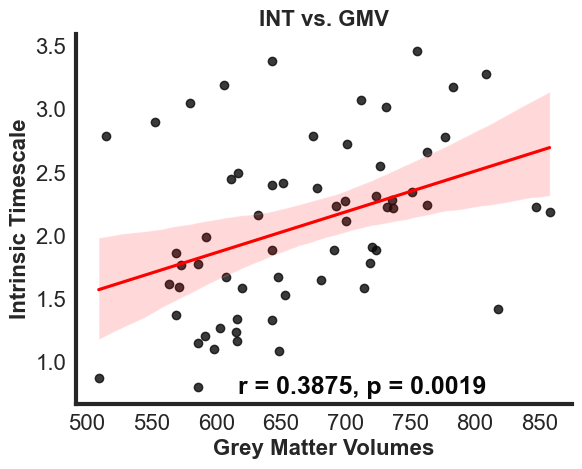

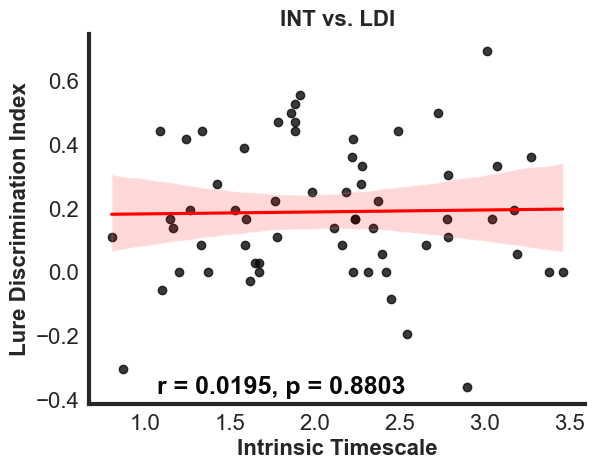

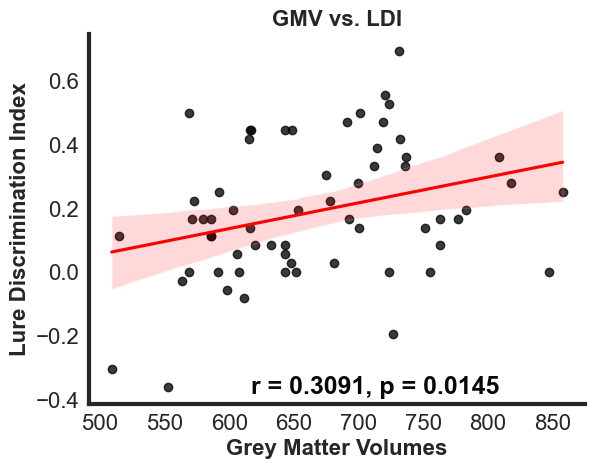

In [151]:
global_gmv = global_gmv_df['GM']
global_intt = global_intt_df['intt']
# print(global_gmv)
# print(global_intt)

x_label = "Grey Matter Volumes"
y_label = "Intrinsic Timescale"
title = "INT vs. GMV"
t, p =  stats.pearsonr(global_gmv, global_intt)
print(f"==> {t,p}")
save_path = 'Interp_global_intt_gmv2.jpg'
col = '.03'
maker = 'o'
plot_sns_linear3(global_gmv, global_intt,x_label, y_label,title,t, p, col, maker, ' ',save_path) 

x_label = "Intrinsic Timescale"
y_label = "Lure Discrimination Index"
title = "INT vs. LDI"
t, p =  stats.pearsonr(global_intt, LDI)
save_path = 'Interp_global_intt_LDI2.jpg'
col = '.03'
maker = 'o'
plot_sns_linear3(global_intt, LDI,x_label, y_label,title,t, p, col, maker, ' ',save_path) 


x_label = "Grey Matter Volumes"
y_label = "Lure Discrimination Index"
title = "GMV vs. LDI"
save_path = 'Interp_global_gmv_LDI2.jpg'
t, p =  stats.pearsonr(global_gmv, LDI)
col = '.03'
maker = 'o'
plot_sns_linear3(global_gmv, LDI, x_label, y_label,title,t, p, col, maker, ' ',save_path) 

In [150]:
def plot_sns_linear3(x, y, x_label, y_label,title,r_value ,p_value, col,maker, name, save_path = None):
    
    fig = plt.figure()
    sns.set_style("white")
    # sinplot()
    sns.despine(top=False, right= True, left=False, bottom=True)
    
    ax = sns.regplot(x= x , y = y,
                        # data= stroke_reconfiguration_all,#x此时为离散变量
                 color= col,
                 marker= maker,line_kws = dict(color="r")
                 )
    # ax.text(3.5, 0.3, f'y = {round(slope,2)}*x+{round(intercept,2)}', ha="center", va="center", color="#5959AB", 
    #     fontsize= 12, fontweight='bold')
    min_y = np.min(y)
    if y_label.startswith('In'):
      min_x = np.min(x)*1.4
    elif x_label.startswith('G'): 
      min_x = np.min(x)*1.4
    else: min_x = 1.8
    ax.text(min_x, min_y, f'r = {round(r_value,4)}, p = {round(p_value,4)}',\
            ha="center", va="center",color= col, fontsize= 18, fontweight= 'bold')
    ax.set_xlabel(f"{x_label}",fontdict={ 'fontproperties':"Arial",'fontsize':16, 'weight':'bold'})
    ax.set_ylabel(f"{y_label}",fontdict={ 'fontproperties':"Arial",'fontsize':16, 'weight':'bold'})
    # ax.set_title(f'GMV vs. INT of {name}',fontsize = 16,weight = 'bold')
    ax.set_title(f'{title}',fontsize = 16, weight = 'bold')
    plt.xticks(fontname = "Arial", fontsize = 16) 
    plt.yticks(fontname = "Arial", fontsize = 16)
    bwith = 3
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    font_prop = font_manager.FontProperties(size = 14, family = 'Arial')
    # plt.legend(prop = font_prop)
    # plt.grid(False)
    # plt.gca().set_xticks([])
    # plt.xticks([])
    # plt.yticks([])
    # ax.set_xticks([])
    # ax.set_yticks([])
    if save_path:
        fig.savefig(save_path, bbox_inches= 'tight', pad_inches= 0, dpi=500)